# Jira Board Connection

In [8]:
#! pip3 install jira
#! python3 -m pip install jira

In [1]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np # For grouped bar chart calculations
from collections import defaultdict, Counter
from jira import JIRA
from getpass import getpass # To securely get the API token
import json
import sys # To exit gracefully on error



In [2]:
# --- Configuration File Handling ---
CONFIG_FILENAME = "config.json"

def load_config(filepath=CONFIG_FILENAME):
    """
    Loads configuration data from a JSON file.

    Args:
        filepath (str): The path to the configuration file.
                        Defaults to CONFIG_FILENAME in the script's directory.

    Returns:
        dict: A dictionary containing the configuration data.
              Returns None if the file cannot be read or parsed.
    """
    config_path = os.path.join(os.getcwd(), filepath) # Look in the current working directory

    if not os.path.exists(config_path):
        print(f"Error: Configuration file not found at '{config_path}'")
        print("Please create the file with your Jira server, email, and API token.")
        return None

    try:
        with open(config_path, 'r') as f:
            config_data = json.load(f)
            # Basic validation (check if essential keys exist)
            required_keys = ["jira_server", "jira_email", "jira_api_token"]
            if not all(key in config_data for key in required_keys):
                missing = [key for key in required_keys if key not in config_data]
                print(f"Error: Configuration file '{config_path}' is missing required keys: {missing}")
                return None
            # Optional: Add more specific validation (e.g., check if token is not empty)
            if not config_data.get("jira_api_token"):
                 print(f"Error: 'jira_api_token' found in '{config_path}' but it is empty.")
                 return None

            print(f"Successfully loaded configuration from '{config_path}'")
            return config_data

    except json.JSONDecodeError as e:
        print(f"Error: Could not parse JSON in configuration file '{config_path}'.")
        print(f"Details: {e}")
        return None
    except Exception as e:
        print(f"Error: An unexpected error occurred while reading '{config_path}'.")
        print(f"Details: {e}")
        return None

# --- Example Usage (Integrating with previous Jira code) ---



In [9]:
# Load configuration at the start
config = load_config()

if config is None:
    print("Exiting due to configuration error.")
    sys.exit(1) # Exit with a non-zero code indicating an error

# Now access credentials from the loaded config dictionary
jira_server = config.get("jira_server")
jira_email = config.get("jira_email")
jira_token = config.get("jira_api_token")

# --- You can now use these variables in your Jira connection logic ---
# (Example snippet from previous code)
# from jira import JIRA

# print(f"\nConnecting to Jira at {JIRA_SERVER} using credentials from config...")
# try:
#     jira_options = {'server': JIRA_SERVER}
#     # Use the loaded credentials for basic_auth
#     jira = JIRA(options=jira_options, basic_auth=(JIRA_EMAIL, JIRA_API_TOKEN))
#     print("Successfully connected to Jira.")
#     # ... rest of your Jira interaction code ...

# except Exception as e:
#     print(f"Failed to connect to Jira: {e}")
#     sys.exit(1)

# --- Placeholder for rest of your script ---
print("\nCredentials loaded:")
print(f"  Server: {jira_server}")
print(f"  Email: {jira_email}")
# Avoid printing the token itself for security!
print(f"  API Token: {'*' * len(jira_token) if jira_token else 'Not Loaded'}")

# ... (Your code to fetch issues, visualize, etc. would go here) ...

print("\nScript finished (example usage).")


Successfully loaded configuration from '/Users/jorge.rodriguez/Library/CloudStorage/GoogleDrive-jorge.rodriguez@audacy.com/My Drive/GitHub/Jira-1/config.json'

Credentials loaded:
  Server: https://entercomdigitalservices.atlassian.net
  Email: jorge.rodriguez@audacy.com
  API Token: ************************************************************************************************************************************************************************************************

Script finished (example usage).


In [10]:
# Authentication
# Jira server URL
#jira_server = "https://xxxxxxxxxx"  # Replace with your Jira instance URL
# Authentication options
# Option 1: Using Personal Access Token (PAT) - Recommended for Jira Cloud
#jira_email = "xxxxxxxxx"  # Replace with your Jira email address
#jira_token = "xxxxxxxxx"  # Replace with your Jira API token

auth_type = "pat"

jira_options = {'server': jira_server}

try:
    if auth_type == "pat":
        jira = JIRA(options=jira_options, basic_auth=(jira_email, jira_token))
        print(f"Successfully connected to Jira at {jira_server} using Personal Access Token.")
    elif auth_type == "basic":
        jira = JIRA(options=jira_options, basic_auth=(jira_username, jira_password))
        print(f"Successfully connected to Jira at {jira_server} using Basic Authentication.")
    else:
        print("Invalid authentication type selected.")
except Exception as e:
    print(f"Error connecting to Jira or accessing boards: {e}")
        

Successfully connected to Jira at https://entercomdigitalservices.atlassian.net using Personal Access Token.


In [12]:
# Get all boards
boards = jira.boards()
print("\n--- All Boards ---")
for board in boards:
    print(f"ID: {board.id}, Name: {board.name}")
print(f"\nTotal Boards Found: {len(boards)}")





--- All Boards ---
ID: 187, Name: Product Ops (Kanban)
ID: 182, Name: Bug Board
ID: 433, Name: Backplane
ID: 189, Name: QA Frequency 2.0
ID: 444, Name: Booster Rocket - Release Team
ID: 637, Name: DPM Planning v3
ID: 346, Name: UPMS Scrum Board
ID: 205, Name: X-Board
ID: 180, Name: FP board
ID: 281, Name: RDC RW
ID: 343, Name: Unity Support Bugs  (WIP)
ID: 255, Name: Management Board
ID: 446, Name: Scrum Board for PMO Test Project
ID: 307, Name: Person Board
ID: 383, Name: EPMO Kanban Board
ID: 419, Name: Pod People (Podcast) WWT
ID: 508, Name: Work & Co
ID: 551, Name: Ops A2 Readiness
ID: 456, Name: November PI - Product Milestone M3
ID: 286, Name: SAFe Feature Design Status
ID: 359, Name: INIT board
ID: 326, Name: DRAUTO KANBAN
ID: 430, Name: Cornerstone
ID: 387, Name: Lodge QAE
ID: 388, Name: On Demand Kanban Board
ID: 304, Name: MARKETOPS board
ID: 416, Name: Mad Chatters (Chat & Mod) WWT
ID: 303, Name: ENGSUPPORT board
ID: 302, Name: Marconi Epics
ID: 340, Name: UMS
ID: 297, Name

In [13]:
# --- Accessing Projects ---

projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    if project.key == "DEVOPS":
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
    #print(f"Key: {project.key}, Name: {project.name}, ID: {project.id}")
    if "DevOps" in project.name:
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
print(f"\nTotal Projects Found: {len(projects)}")
if "DevOps" in projects:
    print("DevOps project found!")
else:
    print("DevOps project not found.")


--- All Projects ---
Found DevOps project Key: AWDS, Name: Amperwave DevOps, ID: 13912
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769

Total Projects Found: 157
DevOps project not found.


In [14]:
# --- Accessing Kanban Statuses ---

project_key_to_check = "DEVOPS"  # Replace with the project key you want to check
found_project = None
for project in projects:
    if project.key == project_key_to_check:
        found_project = project
        break
boards = jira.boards(projectKeyOrID=found_project.id)  # get all boards related to the project
print(boards)
print(f"\n--- All Boards for Project '{found_project.name}' ---")
for board in boards:
    #print(board)
    print(f"ID: {board.id}, Name: {board.name}")        
print(f"\nTotal Boards Found: {len(boards)}")


'''
if found_project:
    boards_all = jira.boards()
    print((boards_all.__len__()))
    print(f"\n--- All Boards ---")
    for board in boards_all:
        print(f"ID: {board.id}, Name: {board.name}")
    print(f"\nTotal Boards Found: {len(boards_all)}")
    boards = [board for board in boards_all if board.id == found_project.key]  # get all boards related to the project
    if boards:
        kanban_boards = [board for board in boards if board.type == 'kanban'] # filter for kanban boards
        if kanban_boards:
            kanban_board = kanban_boards[0] # assuming there is at least one kanban board, take the first one.
            columns = jira.columns(kanban_board.id)
            print(f"\n--- Kanban Statuses for Project '{found_project.name}' (Board: '{kanban_board.name}') ---")
            for column in columns:
                print(f"Column Name: {column.name}")
                for status in column.statuses:
                    print(f"  Status Name: {status.name}")

        else:
            print(f"\nNo Kanban boards found for project '{found_project.name}'.")
    else:
        print(f"\nNo boards found for project '{found_project.name}'.")
else:
    print(f"\nProject with key '{project_key_to_check}' not found.")
'''


[<JIRA Board: name='IT-INFRA', id=222>, <JIRA Board: name='CLOUD-ENG', id=550>, <JIRA Board: name='Platform Engineering Board', id=618>, <JIRA Board: name='DevOps Status Board ', id=594>]

--- All Boards for Project 'DevOps' ---
ID: 222, Name: IT-INFRA
ID: 550, Name: CLOUD-ENG
ID: 618, Name: Platform Engineering Board
ID: 594, Name: DevOps Status Board 

Total Boards Found: 4


'\nif found_project:\n    boards_all = jira.boards()\n    print((boards_all.__len__()))\n    print(f"\n--- All Boards ---")\n    for board in boards_all:\n        print(f"ID: {board.id}, Name: {board.name}")\n    print(f"\nTotal Boards Found: {len(boards_all)}")\n    boards = [board for board in boards_all if board.id == found_project.key]  # get all boards related to the project\n    if boards:\n        kanban_boards = [board for board in boards if board.type == \'kanban\'] # filter for kanban boards\n        if kanban_boards:\n            kanban_board = kanban_boards[0] # assuming there is at least one kanban board, take the first one.\n            columns = jira.columns(kanban_board.id)\n            print(f"\n--- Kanban Statuses for Project \'{found_project.name}\' (Board: \'{kanban_board.name}\') ---")\n            for column in columns:\n                print(f"Column Name: {column.name}")\n                for status in column.statuses:\n                    print(f"  Status Name: 

Fetching issues for project 'DEVOPS'...
Total issues found: 7120
Processing issue: DEVOPS-7445
Processing issue: DEVOPS-7444
Processing issue: DEVOPS-7443
Processing issue: DEVOPS-7442
Processing issue: DEVOPS-7441
Processing issue: DEVOPS-7440
Processing issue: DEVOPS-7439
Processing issue: DEVOPS-7438
Processing issue: DEVOPS-7437
Processing issue: DEVOPS-7436
Processing issue: DEVOPS-7435
Processing issue: DEVOPS-7434
Processing issue: DEVOPS-7433
Processing issue: DEVOPS-7432
Processing issue: DEVOPS-7431
Processing issue: DEVOPS-7430
Processing issue: DEVOPS-7429
Processing issue: DEVOPS-7428
Processing issue: DEVOPS-7427
Processing issue: DEVOPS-7426
Processing issue: DEVOPS-7425
Processing issue: DEVOPS-7424
Processing issue: DEVOPS-7423
Processing issue: DEVOPS-7422
Processing issue: DEVOPS-7421
Processing issue: DEVOPS-7420
Processing issue: DEVOPS-7419
Processing issue: DEVOPS-7418
Processing issue: DEVOPS-7417
Processing issue: DEVOPS-7416
Processing issue: DEVOPS-7415
Proce

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_86375/2124556159.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


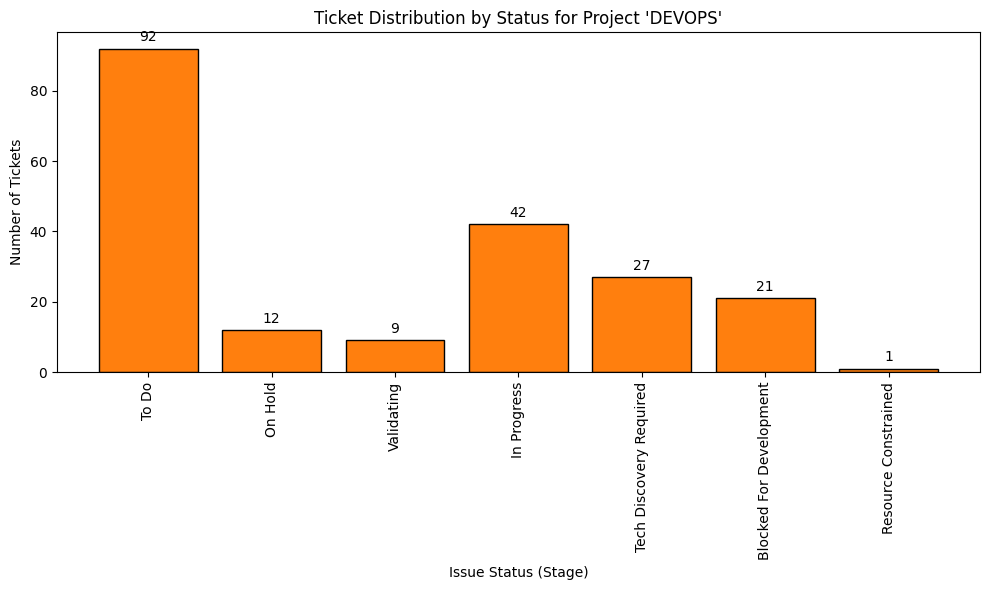

Script finished.


In [ ]:
# --- Fetch Issues from the Project ---
PROJECT_KEY = "DEVOPS"  # Replace with your project key
print(f"Fetching issues for project '{PROJECT_KEY}'...")
issues_in_project = []
jql_query = f'project = "{PROJECT_KEY}" ORDER BY created DESC'

# jira-python handles pagination automatically when iterating
try:
    # Search issues iteratively (handles pagination)
    # Increase maxResults if needed, but iteration is generally preferred
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': 'status'} # Fetch only status field
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None, # No need to expand other fields
                                         json_result=False) # Get Issue objects

    # Process issues as they are fetched
    status_counts = Counter()
    print(f"Total issues found: {issues_iterator.total}")
    total_issues_processed = 0
    for issue in issues_iterator:
        print(f"Processing issue: {issue.key}")
        status_name = issue.fields.status.name
        status_counts[status_name] += 1
        total_issues_processed += 1
        # Optional: Print progress
        if total_issues_processed % 1000 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished fetching. Found {total_issues_processed} issues in total.")

    if not status_counts:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve statuses.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    # Check if it's an authentication error
    if "401" in str(e):
        print("Hint: Check if your JIRA_EMAIL and API Token are correct and have permissions.")
    # Check if it's a project not found error
    elif "404" in str(e) or "project" in str(e).lower():
         print(f"Hint: Check if the project key '{PROJECT_KEY}' is correct.")
    exit()


# --- Prepare Data for Visualization ---
# Remove "Done" and "Will Not Do" statuses if they exist
status_counts.pop("Done", None)
status_counts.pop("Will Not Do", None)

statuses = list(status_counts.keys())
counts = list(status_counts.values())

print("\nTicket Counts per Stage:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")

print(statuses)
# --- Create Visualization ---
print("\nGenerating visualization...")
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

bars = ax.bar(statuses, counts, color='C1', edgecolor='black')

# Add counts above the bars
ax.bar_label(bars, padding=3)

ax.set_xlabel("Issue Status (Stage)")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status for Project '{PROJECT_KEY}'")
#ax.tick_params(axis='x', rotation=90, ha='right') # Rotate labels if they overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()

print("Script finished.")


In [38]:
status_counts

Counter({'To Do': 92,
         'In Progress': 42,
         'Tech Discovery Required': 27,
         'Blocked For Development': 21,
         'On Hold': 12,
         'Validating': 9,
         'Resource Constrained': 1})

In [ ]:
# --- Example JSON Response for an Issue ---
'''
{
  "expand": "renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations",
  "id": "10001",
  "self": "https://your-jira-instance.atlassian.net/rest/api/3/issue/10001",
  "key": "PROJECT-123",
  "fields": {
    "summary": "Example Issue: Fix the login button alignment",
    "description": {
        "type": "doc",
        "version": 1,
        "content": [
            {
                "type": "paragraph",
                "content": [
                    {
                        "type": "text",
                        "text": "The login button on the main page is slightly misaligned on mobile viewports."
                    }
                ]
            }
        ]
    },
    "issuetype": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/issuetype/10000",
      "id": "10000",
      "description": "A task that needs to be done.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "Task",
      "subtask": false,
      "avatarId": 10318
    },
    "project": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/project/10000",
      "id": "10000",
      "key": "PROJECT",
      "name": "Example Project",
      "projectTypeKey": "software",
      "simplified": false,
      "avatarUrls": {
        "48x48": "...",
        "24x24": "...",
        "16x16": "...",
        "32x32": "..."
      }
    },
    "resolution": null, // Example: null if the issue is unresolved
    "resolutiondate": null, // Example: null if the issue is unresolved
    "created": "2023-10-27T10:05:00.123+0000",
    "updated": "2023-10-27T11:15:30.456+0000",
    "priority": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/priority/3",
      "iconUrl": "https://your-jira-instance.atlassian.net/images/icons/priorities/medium.svg",
      "name": "Medium",
      "id": "3"
    },
    "status": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/status/10001",
      "description": "The issue is currently being worked on.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "In Progress",
      "id": "10001",
      "statusCategory": {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/statuscategory/4",
        "id": 4,
        "key": "indeterminate",
        "colorName": "yellow",
        "name": "In Progress"
      }
    },
    "labels": [
      "ui-bug",
      "mobile"
    ],
    "assignee": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "developer@example.com",
      "avatarUrls": { ... },
      "displayName": "Jane Developer",
      "active": true,
      "timeZone": "America/Los_Angeles"
    },
    "reporter": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com",
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "creator": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com", // Often the same as reporter, but not always
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "components": [
      {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/component/10000",
        "id": "10000",
        "name": "User Interface",
        "description": "Handles the frontend display"
      }
    ],
    "fixVersions": [
       {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/version/10001",
        "id": "10001",
        "description": "Release for Q4 features",
        "name": "Version 2.1",
        "archived": false,
        "released": false,
        "releaseDate": "2023-12-15"
      }
    ],
    "environment": "Production - Mobile Web (iOS Safari)",
    "duedate": "2023-11-10",
    "votes": {
      "self": "...",
      "votes": 5,
      "hasVoted": false
    },
    "watches": {
      "self": "...",
      "watchCount": 3,
      "isWatching": true
    },
    "workratio": -1, // Or a calculated value if time tracking is used
    "timespent": 7200, // Example: in seconds (2 hours)
    "timeoriginalestimate": 14400, // Example: in seconds (4 hours)
    "aggregatetimespent": 7200,
    "aggregatetimeoriginalestimate": 14400,
    "security": null, // Or an object if security level is set
    "versions": [], // Affected versions
    // --- Custom Fields ---
    // Custom fields vary greatly. They are identified by 'customfield_xxxxx'
    "customfield_10010": "Some text value", // Example: Text Field (single line)
    "customfield_10011": { // Example: Select List (single choice)
        "self": "...",
        "value": "Option B",
        "id": "10021"
    },
    "customfield_10012": [ // Example: Select List (multiple choices)
        { "self": "...", "value": "Alpha", "id": "10030" },
        { "self": "...", "value": "Gamma", "id": "10032" }
    ],
    "customfield_10013": 123.45, // Example: Number Field
    "customfield_10014": "2023-11-01", // Example: Date Picker
    "customfield_10015": "2023-10-27T14:30:00.000+0000", // Example: Date Time Picker
    "customfield_10016": { // Example: User Picker (single user)
        "self": "...",
        "accountId": "...",
        "displayName": "Alice QA",
        "active": true
        // ... other user details
    },
    "customfield_10017": null // Example: A custom field that hasn't been set
    // ... potentially many more custom fields ...
  }
}
# --- Example JSON Response for an Issue ---
# This is a simplified example. The actual response will contain more fields and nested structures.
'''

In [23]:
# --- Define JQL Query ---
# Fetch issues, including assignee, key, and summary fields
PROJECT_KEY = "DEVOPS"  # Replace with your project key
fields_to_fetch = "assignee, summary, key, status, created, updated, issuetype, creator, project, duedate"  # Fields to fetch

# Start with a base JQL query
jql_clauses = []
if PROJECT_KEY:
    jql_clauses.append(f'project = "{PROJECT_KEY}"')
    print(f"Fetching issues for project '{PROJECT_KEY}'...")
else:
    # Warning: Fetching all issues without a project filter can be very slow
    # and return a huge number of results depending on your Jira instance size
    # and permissions. Consider adding other filters (e.g., status, updatedDate).
    print("Warning: Fetching issues across all accessible projects. This might take a while.")
    # Example: Add a filter for only assigned issues if searching all projects
    # jql_clauses.append("assignee is not EMPTY")

# Combine clauses and add ordering
jql_query = " AND ".join(jql_clauses) if jql_clauses else "" # Handle case with no clauses
jql_query += " ORDER BY assignee ASC, updated DESC"
jql_query = jql_query.strip() # Remove leading/trailing whitespace if needed

print(f"Using JQL: {jql_query if jql_query else 'Searching all issues (no specific JQL)'}")


# --- Fetch and Group Issues by Assignee ---
# Use defaultdict to easily group issues; value is a list of issue details
issues_by_assignee = defaultdict(list)

try:
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': fields_to_fetch}
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None,
                                         json_result=False) # Get Issue objects

    total_issues_processed = 0
    print("Processing issues...")
    for issue in issues_iterator:
        assignee = issue.fields.assignee
        # Use display name if available, otherwise account ID, or 'Unassigned'
        assignee_name = "Unassigned"
        if assignee:
             # Use displayName if available, fallback to name/key/email
             assignee_name = getattr(assignee, 'displayName', getattr(assignee, 'name', getattr(assignee, 'key', getattr(assignee, 'emailAddress', 'Unknown Assignee'))))

        # Store relevant issue info (e.g., key and summary)
        issue_info = {
            "key": issue.key,
            "summary": issue.fields.summary
        }
        issues_by_assignee[assignee_name].append(issue_info)

        total_issues_processed += 1
        if total_issues_processed % 1000 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished processing. Found {total_issues_processed} issues in total.")

    if not issues_by_assignee:
        print("No issues found matching the criteria.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    if "401" in str(e):
        print("Hint: Check JIRA_EMAIL/API Token.")
    elif "400" in str(e) and "JQL" in str(e):
         print(f"Hint: Check if the JQL query is valid: {jql_query}")
    elif PROJECT_KEY and ("404" in str(e) or "project" in str(e).lower()):
         print(f"Hint: Check Project Key '{PROJECT_KEY}'.")
    exit()


# --- Print the Results ---
print("\n--- Issues Grouped by Assignee ---")

# Sort assignees for consistent output, putting 'Unassigned' first
sorted_assignees = sorted([a for a in issues_by_assignee.keys() if a != "Unassigned"])
if "Unassigned" in issues_by_assignee:
    sorted_assignees.insert(0, "Unassigned")

for assignee_name in sorted_assignees:
    print(f"\nAssignee: {assignee_name} ({len(issues_by_assignee[assignee_name])} issues)")
    print("-" * (len(assignee_name) + 11)) # Underline
    for issue_detail in issues_by_assignee[assignee_name]:
        print(f"  - {issue_detail['key']}: {issue_detail['summary']}")

print("\nScript finished.")

Fetching issues for project 'DEVOPS'...
Using JQL: project = "DEVOPS" ORDER BY assignee ASC, updated DESC
Processing issues...
Processed 1000 issues...
Processed 2000 issues...
Processed 3000 issues...
Processed 4000 issues...
Processed 5000 issues...
Processed 6000 issues...
Processed 7000 issues...
Finished processing. Found 7120 issues in total.

--- Issues Grouped by Assignee ---

Assignee: Unassigned (764 issues)
---------------------
  - DEVOPS-6519: [Nonprod] Google Spanner Access
  - DEVOPS-7445: [AATS] Add BQ Credentials and AWS access to the scylla_to_bq_migrators' sqs queue to the ATS query service 
  - DEVOPS-7441: Add RSSIMP_API_KEY and RSSIMP_API_SECRET to nonprod and prod podcast.sops.yaml
  - DEVOPS-7440: Add RSSIMP_API_KEY and RSSIMP_API_SECRET secrets to podcast.sops.yaml prod and nonprod
  - DEVOPS-7421: Check on Domain Status & Redirect
  - DEVOPS-7442: Not able to access to Gitlab
  - DEVOPS-7436: AWS - Add Bernard Wiesner to WO-ONDEMAND > Readonly
  - DEVOPS-7439:

In [43]:

assignee_counts = Counter()
issue_creator_counts = Counter()
status_counts = Counter()
issue_type_counts = Counter()

for issue in issues_iterator:  # Limit to first 20 issues for demonstration
    print(f"Processing issue: {issue.key}")
    print(f"  - Summary: {issue.fields.summary}")
    
    #  Optional: If you want to count statuses for each issue
    #print(f"  - Status: {issue.fields.status.name}")
    print(f"  - Assignee: {issue.fields.assignee.displayName if issue.fields.assignee else 'Unassigned'}")
    if issue.fields.assignee:
        assignee_counts[issue.fields.assignee.displayName] += 1
    else:
        assignee_counts['Unassigned'] += 1
    print(f"  - Created Date: {issue.fields.created}")
    print(f"  - Updated Date: {issue.fields.updated}")
    print(f"  - Issue Type: {issue.fields.issuetype.name}")
    issue_type_counts[issue.fields.issuetype.name] += 1
    print(f"  - Issue ID: {issue.id}")
    print(f"  - Issue Key: {issue.key}")
    print(f"  - Issue URL: {issue.permalink()}")
    print(f"  - Issue Status: {issue.fields.status.name}")
    status_counts[issue.fields.status.name] += 1

    print(f"  - Issue Creator: {issue.fields.creator.displayName if issue.fields.creator else 'Unknown'}")
    issue_creator_counts[issue.fields.creator.displayName] += 1

    print(f"  - Project: {issue.fields.project.name}")
    print(f"  - Project ID: {issue.fields.project.id}")
    print(f"  - Project Key: {issue.fields.project.key}")
    print(f"  - Project Due Date: {issue.fields.duedate if issue.fields.duedate else 'No Due Date'}")
    #print(f"  - Project Created: {issue.fields.created}")
    #print(f"  - Project Updated: {issue.fields.updated}")
    #print(f"  - Project Resolution: {issue.fields.resolution.name if issue.fields.resolution else 'Unresolved'}")
    #print(f"  - Project Resolution Date: {issue.fields.resolutiondate if issue.fields.resolutiondate else 'Not Resolved'}")
    #print(f"  - Project Environment: {issue.fields.environment if issue.fields.environment else 'No Environment'}")
    #print(f"  - Project Labels: {issue.fields.labels if issue.fields.labels else 'No Labels'}")
    #print(f"  - Project Components: {issue.fields.components if issue.fields.components else 'No Components'}")
    #print(f"  - Project Fix Versions: {issue.fields.fixVersions if issue.fields.fixVersions else 'No Fix Versions'}")
    #print(f"  - Project Security: {issue.fields.security if issue.fields.security else 'No Security Level'}")
    #print(f"  - Project Votes: {issue.fields.votes.votes if issue.fields.votes else 'No Votes'}")
    #print(f"  - Project Watches: {issue.fields.watches.watchCount if issue.fields.watches else 'No Watches'}")
    #print(f"  - Project Work Ratio: {issue.fields.workratio if issue.fields.workratio else 'No Work Ratio'}")
    #print(f"  - Project Time Spent: {issue.fields.timespent if issue.fields.timespent else 'No Time Spent'}")
    #print(f"  - Project Original Estimate: {issue.fields.timeoriginalestimate if issue.fields.timeoriginalestimate else 'No Original Estimate'}")
    #print(f"  - Project Aggregate Time Spent: {issue.fields.aggregatetimespent if issue.fields.aggregatetimespent else 'No Aggregate Time Spent'}")
    #print(f"  - Project Aggregate Original Estimate: {issue.fields.aggregatetimeoriginalestimate if issue.fields.aggregatetimeoriginalestimate else 'No Aggregate Original Estimate'}")
    #print(f"  - Project Custom Fields: {issue.fields.customfield_10010 if issue.fields.customfield_10010 else 'No Custom Fields'}")
    print("-"*50) # Separator
    
    #status_name = issue.fields.status.name
    #status_counts[status_name] += 1
    #total_issues_processed += 1
    # Optional: Print progress

print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\n--- Summary of Counts ---")
print("\nAssignee Counts:")
for assignee, count in assignee_counts.items():
    print(f"- {assignee}: {count}")
print("\nIssue Creator Counts:")
for creator, count in issue_creator_counts.items():
    print(f"- {creator}: {count}")
print("\nStatus Counts:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")
print("\nIssue Type Counts:")
for issue_type, count in issue_type_counts.items():
    print(f"- {issue_type}: {count}")
print("\nScript finished.")

Processing issue: DEVOPS-7430
  - Summary: Master ticket for full standup of GCP Audio Licensing Ops prj-initiatives-nonprod
  - Assignee: Adam Shero
  - Created Date: 2025-04-15T09:01:05.875-0600
  - Updated Date: 2025-04-17T10:18:23.691-0600
  - Issue Type: Story
  - Issue ID: 163561
  - Issue Key: DEVOPS-7430
  - Issue URL: https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7430
  - Issue Status: To Do
  - Issue Creator: Mark Buchanan
  - Project: DevOps
  - Project ID: 13769
  - Project Key: DEVOPS
  - Project Due Date: No Due Date
--------------------------------------------------
Processing issue: DEVOPS-6596
  - Summary: Upgrade all HelmRelease using A2 chart to helm chart a2 version 2.3.0 in amperwave-prod eks cluster
  - Assignee: Adam Shero
  - Created Date: 2024-11-13T10:40:31.143-0700
  - Updated Date: 2025-04-15T10:32:38.176-0600
  - Issue Type: Task
  - Issue ID: 157049
  - Issue Key: DEVOPS-6596
  - Issue URL: https://entercomdigitalservices.atlassian.net/browse

In [ ]:
print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\n--- Summary of Counts ---")
print("\nAssignee Counts:")
for assignee, count in assignee_counts.items():
    print(f"- {assignee}: {count}")
print("\nIssue Creator Counts:")
for creator, count in issue_creator_counts.items():
    print(f"- {creator}: {count}")
print("\nStatus Counts:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")
print("\nIssue Type Counts:")
for issue_type, count in issue_type_counts.items():
    print(f"- {issue_type}: {count}")
print("\nScript finished.")

Finished fetching. Found 7120 issues in total.

--- Summary of Counts ---

Assignee Counts:
- Adam Shero: 275
- Adrien.Carlson: 1
- AkashD: 39
- Alex Wilson: 2
- Amy Van Hook: 2
- Andy Drake: 1
- Angel Cancio: 343
- Arjun Parajuli: 1
- Ben Bonora: 7
- Bolanle: 603
- Bryan Harris: 1
- Carlos Zuniga Ballestero: 3
- Christian Tragesser: 1
- Cris Stoddard: 1
- Cullen Philippson: 284
- Daniel Warshaw: 1
- Danish Sattar: 6
- Dan Shepard: 572
- David Caballero: 511
- David Caballero Miranda: 67
- David Wright: 1
- Dewayne Korth: 1
- Dwayne Steinway: 9
- Ed Colgan: 1
- Ella Arana: 1
- Eric Paul: 207
- Erin Fink: 38
- Fadi Elkhatib: 2
- Felix Curry: 1
- Nathan Carmine: 1
- Harold Wilson: 1
- Former user: 135
- Jon West: 6
- Chad: 30
- Kiran Yellamarthi: 7
- Hammad Daoud: 13
- hani.kanafani: 2
- Henry Wadsworth: 1
- James Brown: 6
- Jason Cox: 2
- Jeff Naparstek: 1
- Jeff Slutz: 2
- Jere Jones: 7
- Jeremy Chase: 40
- jeremy.williams: 1
- Jerry Hill: 1
- Jesse.Larson: 1
- Joel Flickinger: 68
- Jo

In [46]:
df_assignee = pd.DataFrame(assignee_counts.items(), columns=['Assignee', 'Count'])
df_assignee = df_assignee.sort_values(by='Count', ascending=False)
df_assignee.reset_index(drop=True, inplace=True)
print("\n--- Assignee Counts DataFrame ---")
df_assignee


--- Assignee Counts DataFrame ---


Assignee  Count
0           Tom Terry   1075
1          Unassigned    764
2             Bolanle    603
3         Dan Shepard    572
4     David Caballero    511
..                ...    ...
84      Sherman Glass      1
85      stephen.smith      1
86  stephanie.barulic      1
87       Vincent Murr      1
88    Vitaly Shoykhet      1

[89 rows x 2 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_86375/882907085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')


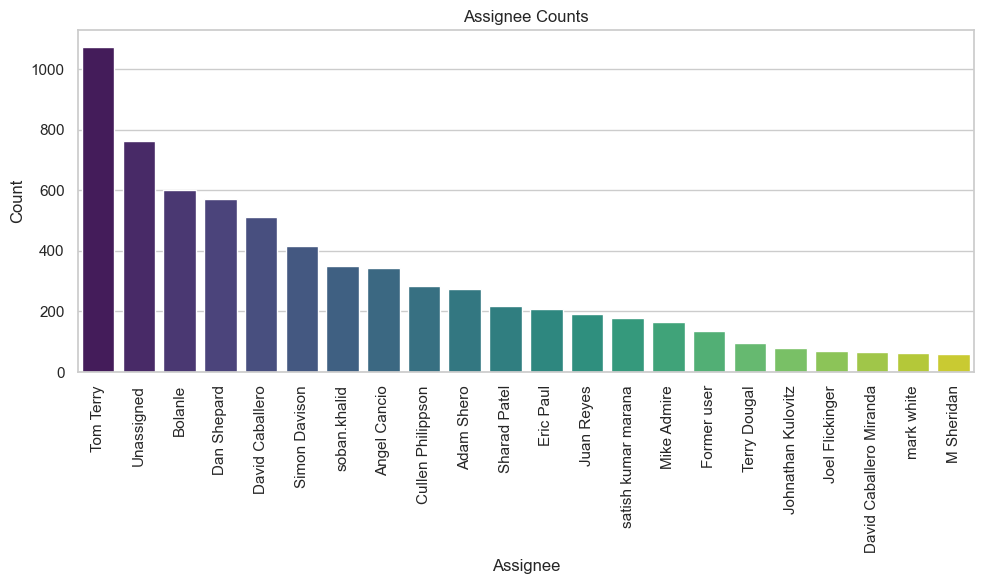

In [60]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')
plt.title('Assignee Counts')
plt.xlabel('Assignee')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
df_creator = pd.DataFrame(issue_creator_counts.items(), columns=['creator', 'Count'])
df_creator = df_creator.sort_values(by='Count', ascending=False)
df_creator.reset_index(drop=True, inplace=True)
print("\n--- creator Counts DataFrame ---")
df_creator



--- creator Counts DataFrame ---


creator  Count
0             David Caballero    436
1                  Adam Shero    335
2                 Former user    325
3    Zendesk Support for Jira    306
4                   Tom Terry    210
..                        ...    ...
302             Kevin Damazyn      1
303           Stephen Wolters      1
304         Joshua Pappalardo      1
305              tom.schairer      1
306   Jason Lowenthal-Hershey      1

[307 rows x 2 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_86375/2755360980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')


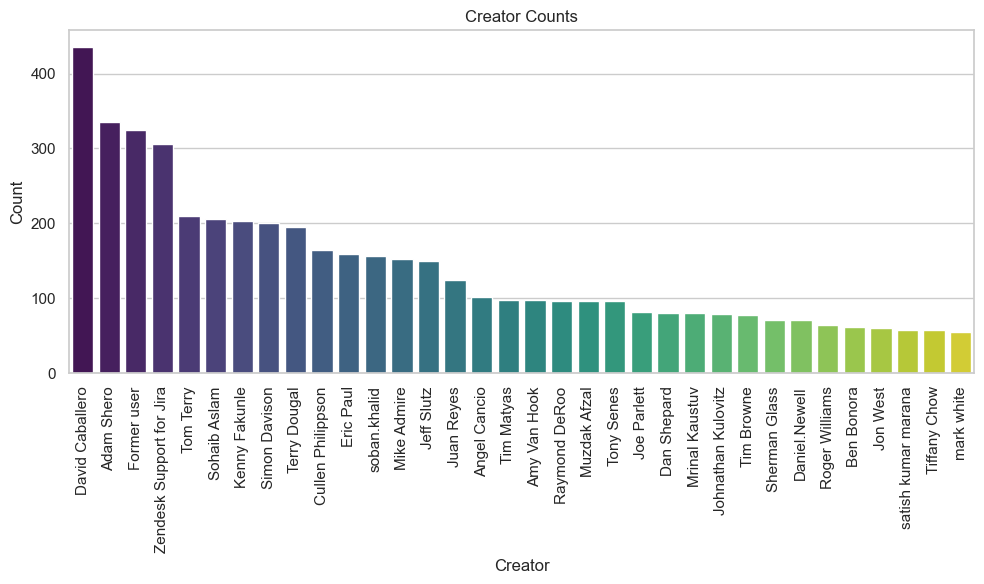

In [59]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')
plt.title('Creator Counts')
plt.xlabel('Creator')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
df_issue_type = pd.DataFrame(issue_type_counts.items(), columns=['Issue Type', 'Count'])
df_issue_type = df_issue_type.sort_values(by='Count', ascending=False)
df_issue_type.reset_index(drop=True, inplace=True)
print("\n--- Issue Type Counts DataFrame ---")
df_issue_type


--- Issue Type Counts DataFrame ---


Issue Type  Count
0                 Task   4129
1                Story   1741
2              Support    402
3              Feature    361
4                  Bug    229
5             Sub-task    145
6               Legend     21
7          Post Mortem     21
8             Incident     19
9               Change     19
10  Change and Release     13
11              Hotfix      8
12         Improvement      6
13            Security      5
14          Regression      1

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_86375/3259829271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')


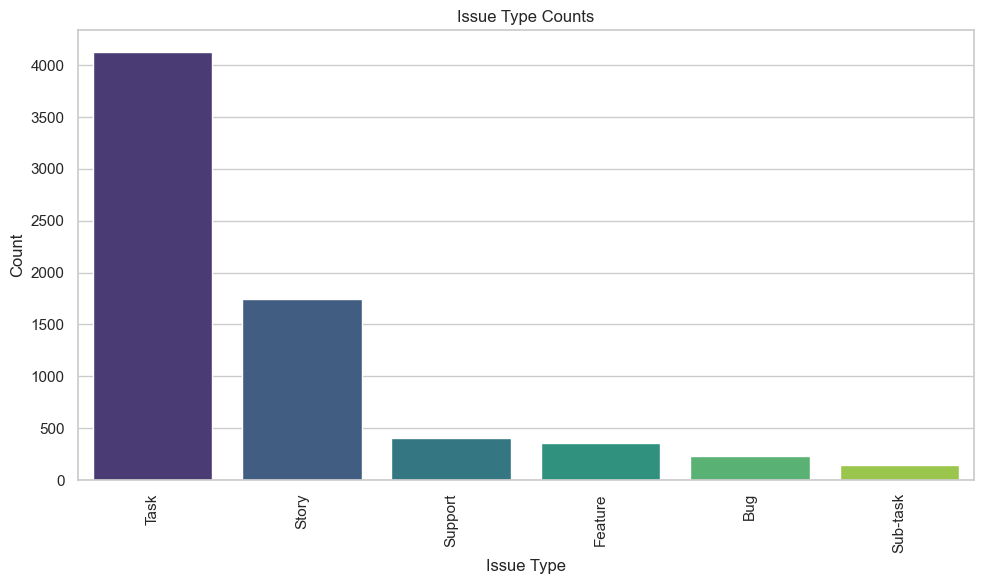

In [58]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')
plt.title('Issue Type Counts')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

An error occurred during issue processing: name 'jql_query' is not defined

--- Detailed Ticket Breakdown ---

--- Preparing Data for Status vs Team Visualization ---
Generating Status vs Team visualization...


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_10641/3034703743.py:152: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  team_colors = plt.cm.get_cmap('tab20', len(plot_teams)) # Get distinct colors


NameError: name 'PROJECT_KEY' is not defined

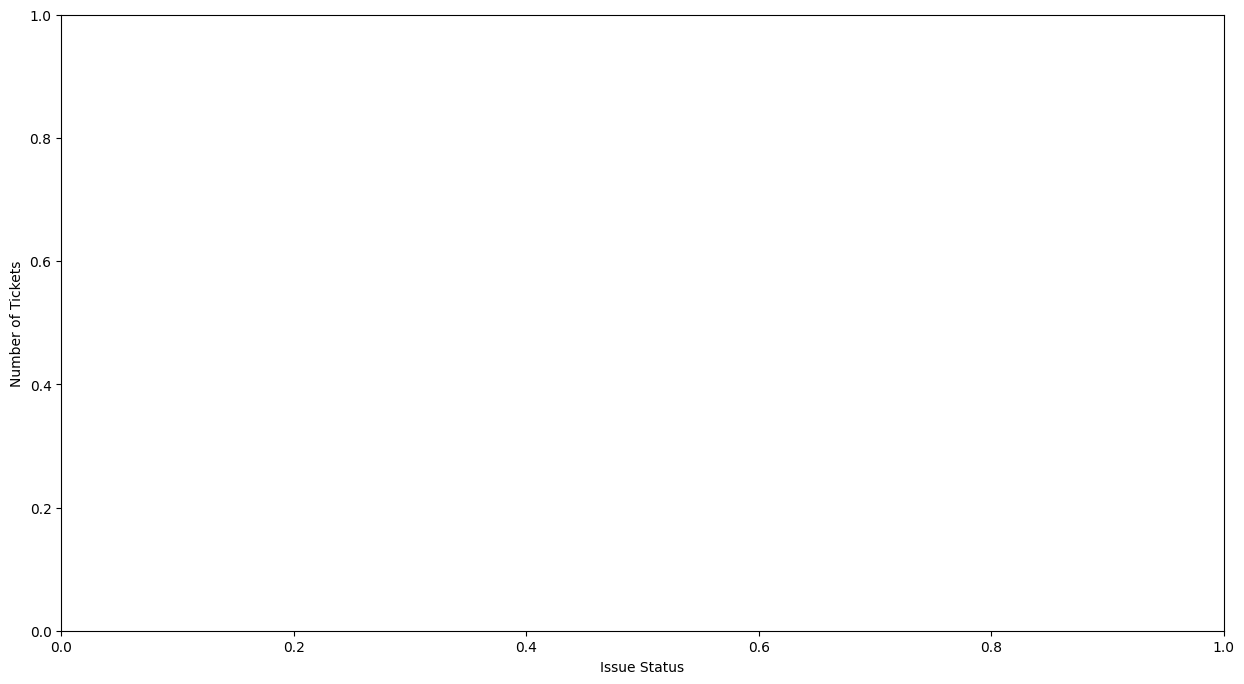

: 

In [ ]:
# Using defaultdict for easier nested structure creation
# Structure: status_breakdown[status_name][team_name][assignee_name] = count
status_breakdown = defaultdict(lambda: defaultdict(lambda: Counter()))
all_teams = set()
all_assignees = set()
all_statuses = set()
# --- Fetch Issues with Detailed Breakdown ---
fields_to_fetch = ['status']  # Add the custom field name here
REPORTING_TEAM_FIELD_NAME = "status"

try:
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': fields_to_fetch}
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None,
                                         json_result=False)

    total_issues_processed = 0
    print("Processing issues (Status, Team, Assignee)...")
    for issue in issues_iterator:
        status_name = issue.fields.status.name
        all_statuses.add(status_name)

        # --- Get Assignee ---
        assignee = issue.fields.assignee
        # Use display name if available, otherwise account ID, or 'Unassigned'
        assignee_name = "Unassigned"
        if assignee:
             # Use displayName if available, fallback to name/key/email
             assignee_name = getattr(assignee, 'displayName', getattr(assignee, 'name', getattr(assignee, 'key', getattr(assignee, 'emailAddress', 'Unknown Assignee'))))
        all_assignees.add(assignee_name)


        # --- Get Reporting Team (Handle potential errors/missing field) ---
        team_name = f"<No '{REPORTING_TEAM_FIELD_NAME}'>" # Default if field missing or empty
        try:
            # Custom fields are accessed via getattr
            team_field_value = getattr(issue.fields, REPORTING_TEAM_FIELD_NAME, None)
            if team_field_value:
                 # Custom fields can be complex (objects, lists, strings). Adapt as needed.
                 # Assuming it's an object with a 'value' or 'name' attribute, or just a string.
                 if hasattr(team_field_value, 'value'):
                     team_name = team_field_value.value
                 elif hasattr(team_field_value, 'name'):
                     team_name = team_field_value.name
                 elif isinstance(team_field_value, str):
                     team_name = team_field_value
                 else:
                     # Fallback if it's an unexpected type
                     team_name = str(team_field_value)

                 if not team_name: # Handle empty string value
                     team_name = f"<Empty '{REPORTING_TEAM_FIELD_NAME}'>"

        except AttributeError:
            # Field doesn't exist on this issue type/project configuration
            # The default value assigned above will be used.
            pass
        except Exception as e:
             print(f"Warning: Could not process team field '{REPORTING_TEAM_FIELD_NAME}' for issue {issue.key}: {e}")
             # Use the default value

        all_teams.add(team_name)

        # --- Increment Count ---
        status_breakdown[status_name][team_name][assignee_name] += 1

        total_issues_processed += 1
        if total_issues_processed % 100 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished fetching. Processed {total_issues_processed} issues in total.")

    if not status_breakdown:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve necessary fields.")
        exit()

except Exception as e:
    print(f"An error occurred during issue processing: {e}")
    if "401" in str(e):
        print("Hint: Check JIRA_EMAIL/API Token.")
    elif "404" in str(e) or "project" in str(e).lower():
         print(f"Hint: Check Project Key '{PROJECT_KEY}'.")
    elif "field" in str(e).lower() and REPORTING_TEAM_FIELD_NAME in str(e):
         print(f"Hint: Check if '{REPORTING_TEAM_FIELD_NAME}' is the correct field ID/name and is accessible.")
    exit()


# --- Print Detailed Breakdown ---
print("\n--- Detailed Ticket Breakdown ---")
sorted_statuses = sorted(list(all_statuses))
sorted_teams = sorted(list(all_teams))

# Remove "Done" and "Will Not Do" statuses if they exist
if "Done" in sorted_statuses:
    sorted_statuses.remove("Done")
if "Will Not Do" in sorted_statuses:
    sorted_statuses.remove("Will Not Do")

# Sort assignees, putting 'Unassigned' first if present
sorted_assignees = sorted([a for a in all_assignees if a != "Unassigned"])
if "Unassigned" in all_assignees:
    sorted_assignees.insert(0, "Unassigned")


for status in sorted_statuses:
    print(f"\nStatus: {status}")
    if status not in status_breakdown:
        print("  (No tickets in this status)")
        continue

    status_total = 0
    teams_in_status = sorted(status_breakdown[status].keys())
    for team in teams_in_status:
        print(f"  Team: {team}")
        team_total = 0
        assignees_in_team = sorted(status_breakdown[status][team].keys())
        for assignee in assignees_in_team:
            count = status_breakdown[status][team][assignee]
            print(f"    - {assignee}: {count}")
            team_total += count
        print(f"    --------------------")
        print(f"    Team Total: {team_total}")
        status_total += team_total
    print(f"  ====================")
    print(f"  Status Total ({status}): {status_total}")


# --- Prepare Data for Visualization (Status vs Team) ---
print("\n--- Preparing Data for Status vs Team Visualization ---")
# Calculate counts per status per team
vis_data = defaultdict(lambda: Counter())
for status, teams_dict in status_breakdown.items():
    for team, assignees_counter in teams_dict.items():
        vis_data[status][team] = sum(assignees_counter.values())

# --- Create Grouped Bar Chart (Status vs Team) ---
print("Generating Status vs Team visualization...")

# Sort statuses and teams for consistent plotting order
plot_statuses = sorted_statuses
plot_teams = sorted_teams

x = np.arange(len(plot_statuses))  # the label locations
width = 0.8 / len(plot_teams) if plot_teams else 0.8 # the width of the bars (adjust denominator for spacing)
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8)) # Adjust size as needed

# Create bars for each team within each status group
team_colors = plt.cm.get_cmap('tab20', len(plot_teams)) # Get distinct colors

for i, team in enumerate(plot_teams):
    team_counts = [vis_data[status].get(team, 0) for status in plot_statuses]
    offset = width * i - (width * (len(plot_teams) -1) / 2) # Center the group
    rects = ax.bar(x + offset, team_counts, width, label=team, color=team_colors(i))
    ax.bar_label(rects, padding=3, fontsize=8) # Add labels above bars

# Add some text for labels, title and axes ticks
ax.set_xlabel("Issue Status")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status and Team for Project '{PROJECT_KEY}'")
ax.set_xticks(x, plot_statuses)
#ax.tick_params(axis='x', rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot

plt.tight_layout()

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()

print("Script finished.")

In [ ]:
from jira import JIRA

# Jira server URL
jira_server = "https://entercomdigitalservices.atlassian.net"  # Replace with your Jira instance URL

# Authentication options
# Option 1: Using Personal Access Token (PAT) - Recommended for Jira Cloud
jira_email = "jorge.rodriguez@audacy.com"  # Replace with your Jira email address
jira_token = "ATATT3xFfGF0asZX_TygSi7z-_h5NZYo9kWb9om_4pbIul6g02nY7CaxkSxVVyuf_tYXUw90kjABihf-a_ftJ0XwBO7qJsRhS1HBnaRVpC30Sa-8rnkski8HDfX3D7YjCjFU8KH4TGmet5hZGY_FzCudV2EL_zbMRVjO67oIG0bWTAqzeK9m5jE=5B9D74D6"  # Replace with your Jira API token
auth_type = "pat"

# Option 2: Basic Authentication (Username and Password) - Less secure, may not be supported in Jira Cloud
#jira_username = "YOUR_USERNAME"  # Replace with your Jira username
#jira_password = "YOUR_PASSWORD"  # Replace with your Jira password
# To use this option, set auth_type to "basic"

jira_options = {'server': jira_server}

try:
    if auth_type == "pat":
        jira = JIRA(options=jira_options, basic_auth=(jira_email, jira_token))
        print(f"Successfully connected to Jira at {jira_server} using Personal Access Token.")
    elif auth_type == "basic":
        jira = JIRA(options=jira_options, basic_auth=(jira_username, jira_password))
        print(f"Successfully connected to Jira at {jira_server} using Basic Authentication.")
    else:
        print("Invalid authentication type selected.")
        exit()

    # --- Accessing Boards ---

    # Get all boards
    boards = jira.boards()
    print("\n--- All Boards ---")
    for board in boards:
        print(f"ID: {board.id}, Name: {board.name}")

    if boards:
        # Get sprints for the first board
        first_board_id = boards[0].id
        sprints = jira.sprints(first_board_id)
        print(f"\n--- Sprints on Board '{boards[0].name}' (ID: {first_board_id}) ---")
        if sprints:
            for sprint in sprints:
                print(f"ID: {sprint.id}, Name: {sprint.name}, State: {sprint.state}")
        else:
            print("No sprints found on this board.")

        # You can also search for boards by name (exact match)
        board_name_to_find = "YOUR_BOARD_NAME"  # Replace with the exact board name
        found_boards = [board for board in boards if board.name == board_name_to_find]
        if found_boards:
            print(f"\n--- Found Boards with Name '{board_name_to_find}' ---")
            for board in found_boards:
                print(f"ID: {board.id}, Name: {board.name}")
        else:
            print(f"\nNo board found with the name '{board_name_to_find}'.")

    else:
        print("No boards found in this Jira instance.")

except Exception as e:
    print(f"Error connecting to Jira or accessing boards: {e}")